# Collect Tweets into MongoDB

## Install Python libraries

You may need to restart your Jupyter Notebook instance after installed those libraries.

In [2]:
!pip install pymongo

     |████████████████████████████████| 508 kB 12.5 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [3]:
!pip install pymongo[srv]

     |████████████████████████████████| 188 kB 18.1 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [4]:
!pip install dnspython

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [5]:
!pip install tweepy

     |████████████████████████████████| 147 kB 18.9 MB/s eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


In [6]:
!pip install twitter

     |████████████████████████████████| 54 kB 3.2 MB/s  eta 0:00:01
You should consider upgrading via the '/home/ec2-user/anaconda3/envs/python3/bin/python -m pip install --upgrade pip' command.


## Import Python libraries

In [8]:
import pymongo
from pymongo import MongoClient
import json
import tweepy
import twitter
from pprint import pprint
import configparser
import pandas as pd

##  Load the Authorization Info

Save database connection info and API Keys in a config.ini file and use the configparse to load the authorization info. 

In [11]:
config = configparser.ConfigParser()
config.read('config.ini')

CONSUMER_KEY      = config['mytwitter']['api_key']
CONSUMER_SECRET   = config['mytwitter']['api_secret']
OAUTH_TOKEN       = config['mytwitter']['access_token']
OATH_TOKEN_SECRET = config['mytwitter']['access_secret']

mongod_connect = config['mymongo']['connection']

## Connect to the MongoDB Cluster

In [12]:
client = MongoClient(mongod_connect)
db = client.gp29 # use or create a database named demo
tweet_collection = db.lab10 #use or create a collection named tweet_collection
tweet_collection.create_index([("id", pymongo.ASCENDING)],unique = True) # make sure the collected tweets are unique

'id_1'

## Use the Streaming API to Collect Tweets

Authorize the Stream API 

In [16]:
stream_auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
stream_auth.set_access_token(OAUTH_TOKEN, OATH_TOKEN_SECRET)

strem_api = tweepy.API(stream_auth)

Define the query for the Stream API

In [17]:
track = ['covid19'] # define the keywords, tweets contain election

#locations = [-78.9326449,38.4150904,-78.8816972,38.4450731] #defin the location, in Harrisonburg, VA

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> OR </span> are located in Harrisonburg, VA

In [18]:
class MyStreamListener(tweepy.StreamListener):
    def on_status(self, status):
        print (status.id_str)
        try:
            tweet_collection.insert_one(status._json)
        except:
            pass
  
    def on_error(self, status_code):
        if status_code == 420:
            #returning False in on_data disconnects the stream
            return False
myStreamListener = MyStreamListener()
myStream = tweepy.Stream(auth = strem_api.auth, listener=myStreamListener)
myStream.filter(track=track)#  (locations = locations)   #Use either track or locations

1328141371836936195
1328141373766189056
1328141374588416000
1328141375104118784
1328141375326408704
1328141375821516802
1328141377163714566
1328141377667035138
1328141378854014978
1328141378832920577
1328141379109867520
1328141379894210561
1328141380141649922
1328141380795781123
1328141381035053058
1328141381231992832
1328141382997864448
1328141383085957125
1328141382905712640
1328141383165734916
1328141383992020993
1328141383866126342
1328141384067526658
1328141384658763776
1328141385061474304
1328141385128677377
1328141387209056256
1328141391961100288
1328141393177366528
1328141395035643906
1328141397677883398
1328141397011128323
1328141398453997570
1328141398663716865
1328141398785355777
1328141399816978434
1328141400433717248
1328141400370647041
1328141400660205568
1328141400672665600
1328141403109593088
1328141403575226368
1328141404774617090
1328141405475188736
1328141405957533696
1328141406007914499
1328141406263799810
1328141405651300352
1328141406276366344
1328141407522066440


KeyboardInterrupt: 

## Use the REST API to Collect Tweets

Authorize the REST API 

In [19]:
rest_auth = twitter.oauth.OAuth(OAUTH_TOKEN,OATH_TOKEN_SECRET,CONSUMER_KEY,CONSUMER_SECRET)
rest_api = twitter.Twitter(auth=rest_auth)

Define the query for the REST API

In [20]:
count = 100 #number of returned tweets, default and max is 100
#geocode = "38.4392897,-78.9412224,50mi"  # defin the location, in Harrisonburg, VA
q = "covid19"                               #define the keywords, tweets contain election

The collected tweets will contain 'election' <span style="color:red;font-weight:bold"> AND </span> are located in Harrisonburg, VA

In [21]:
search_results = rest_api.search.tweets( count=count,q=q) #you can use both q and geocode
statuses = search_results["statuses"]
since_id_new = statuses[-1]['id']
for statuse in statuses:
    try:
        tweet_collection.insert_one(statuse)
        pprint(statuse['created_at'])# print the date of the collected tweets
    except:
        pass

'Mon Nov 16 01:04:41 +0000 2020'
'Mon Nov 16 01:04:41 +0000 2020'
'Mon Nov 16 01:04:41 +0000 2020'
'Mon Nov 16 01:04:41 +0000 2020'
'Mon Nov 16 01:04:40 +0000 2020'
'Mon Nov 16 01:04:40 +0000 2020'
'Mon Nov 16 01:04:40 +0000 2020'
'Mon Nov 16 01:04:39 +0000 2020'
'Mon Nov 16 01:04:39 +0000 2020'
'Mon Nov 16 01:04:39 +0000 2020'
'Mon Nov 16 01:04:39 +0000 2020'
'Mon Nov 16 01:04:39 +0000 2020'
'Mon Nov 16 01:04:38 +0000 2020'
'Mon Nov 16 01:04:38 +0000 2020'
'Mon Nov 16 01:04:38 +0000 2020'
'Mon Nov 16 01:04:38 +0000 2020'
'Mon Nov 16 01:04:37 +0000 2020'
'Mon Nov 16 01:04:36 +0000 2020'
'Mon Nov 16 01:04:36 +0000 2020'
'Mon Nov 16 01:04:36 +0000 2020'
'Mon Nov 16 01:04:36 +0000 2020'
'Mon Nov 16 01:04:36 +0000 2020'
'Mon Nov 16 01:04:35 +0000 2020'
'Mon Nov 16 01:04:35 +0000 2020'
'Mon Nov 16 01:04:34 +0000 2020'
'Mon Nov 16 01:04:34 +0000 2020'
'Mon Nov 16 01:04:34 +0000 2020'
'Mon Nov 16 01:04:34 +0000 2020'
'Mon Nov 16 01:04:34 +0000 2020'
'Mon Nov 16 01:04:33 +0000 2020'
'Mon Nov 1

Continue fetching early tweets with the same query. 
<p><span style="color:red;font-weight:bold">YOU WILL REACH YOUR RATE LIMIT VERY FAST</span></p>

In [22]:
since_id_old = 0
while(since_id_new != since_id_old):
    since_id_old = since_id_new
    search_results = rest_api.search.tweets( count=count,q=q,
                        max_id= since_id_new)
    statuses = search_results["statuses"]
    since_id_new = statuses[-1]['id']
    for statuse in statuses:
        try:
            tweet_collection.insert_one(statuse)
            pprint(statuse['created_at']) # print the date of the collected tweets
        except:
            pass

'Mon Nov 16 01:04:12 +0000 2020'
'Mon Nov 16 01:04:11 +0000 2020'
'Mon Nov 16 01:04:11 +0000 2020'
'Mon Nov 16 01:04:11 +0000 2020'
'Mon Nov 16 01:04:11 +0000 2020'
'Mon Nov 16 01:04:11 +0000 2020'
'Mon Nov 16 01:04:11 +0000 2020'
'Mon Nov 16 01:04:10 +0000 2020'
'Mon Nov 16 01:04:09 +0000 2020'
'Mon Nov 16 01:04:09 +0000 2020'
'Mon Nov 16 01:04:09 +0000 2020'
'Mon Nov 16 01:04:09 +0000 2020'
'Mon Nov 16 01:04:08 +0000 2020'
'Mon Nov 16 01:04:08 +0000 2020'
'Mon Nov 16 01:04:08 +0000 2020'
'Mon Nov 16 01:04:07 +0000 2020'
'Mon Nov 16 01:04:06 +0000 2020'
'Mon Nov 16 01:04:05 +0000 2020'
'Mon Nov 16 01:04:05 +0000 2020'
'Mon Nov 16 01:04:05 +0000 2020'
'Mon Nov 16 01:04:05 +0000 2020'
'Mon Nov 16 01:04:04 +0000 2020'
'Mon Nov 16 01:04:04 +0000 2020'
'Mon Nov 16 01:04:04 +0000 2020'
'Mon Nov 16 01:04:04 +0000 2020'
'Mon Nov 16 01:04:04 +0000 2020'
'Mon Nov 16 01:04:04 +0000 2020'
'Mon Nov 16 01:04:04 +0000 2020'
'Mon Nov 16 01:04:04 +0000 2020'
'Mon Nov 16 01:04:03 +0000 2020'
'Mon Nov 1

'Mon Nov 16 01:03:00 +0000 2020'
'Mon Nov 16 01:03:00 +0000 2020'
'Mon Nov 16 01:03:00 +0000 2020'
'Mon Nov 16 01:03:00 +0000 2020'
'Mon Nov 16 01:02:59 +0000 2020'
'Mon Nov 16 01:02:59 +0000 2020'
'Mon Nov 16 01:02:58 +0000 2020'
'Mon Nov 16 01:02:58 +0000 2020'
'Mon Nov 16 01:02:58 +0000 2020'
'Mon Nov 16 01:02:57 +0000 2020'
'Mon Nov 16 01:02:57 +0000 2020'
'Mon Nov 16 01:02:57 +0000 2020'
'Mon Nov 16 01:02:57 +0000 2020'
'Mon Nov 16 01:02:57 +0000 2020'
'Mon Nov 16 01:02:55 +0000 2020'
'Mon Nov 16 01:02:55 +0000 2020'
'Mon Nov 16 01:02:55 +0000 2020'
'Mon Nov 16 01:02:54 +0000 2020'
'Mon Nov 16 01:02:54 +0000 2020'
'Mon Nov 16 01:02:54 +0000 2020'
'Mon Nov 16 01:02:54 +0000 2020'
'Mon Nov 16 01:02:54 +0000 2020'
'Mon Nov 16 01:02:53 +0000 2020'
'Mon Nov 16 01:02:53 +0000 2020'
'Mon Nov 16 01:02:53 +0000 2020'
'Mon Nov 16 01:02:52 +0000 2020'
'Mon Nov 16 01:02:52 +0000 2020'
'Mon Nov 16 01:02:52 +0000 2020'
'Mon Nov 16 01:02:52 +0000 2020'
'Mon Nov 16 01:02:52 +0000 2020'
'Mon Nov 1

'Mon Nov 16 01:01:05 +0000 2020'
'Mon Nov 16 01:01:05 +0000 2020'
'Mon Nov 16 01:01:05 +0000 2020'
'Mon Nov 16 01:01:05 +0000 2020'
'Mon Nov 16 01:01:05 +0000 2020'
'Mon Nov 16 01:01:05 +0000 2020'
'Mon Nov 16 01:01:04 +0000 2020'
'Mon Nov 16 01:01:04 +0000 2020'
'Mon Nov 16 01:01:04 +0000 2020'
'Mon Nov 16 01:01:04 +0000 2020'
'Mon Nov 16 01:01:03 +0000 2020'
'Mon Nov 16 01:01:03 +0000 2020'
'Mon Nov 16 01:01:03 +0000 2020'
'Mon Nov 16 01:01:03 +0000 2020'
'Mon Nov 16 01:01:03 +0000 2020'
'Mon Nov 16 01:01:02 +0000 2020'
'Mon Nov 16 01:01:02 +0000 2020'
'Mon Nov 16 01:01:01 +0000 2020'
'Mon Nov 16 01:01:01 +0000 2020'
'Mon Nov 16 01:01:01 +0000 2020'
'Mon Nov 16 01:01:01 +0000 2020'
'Mon Nov 16 01:01:01 +0000 2020'
'Mon Nov 16 01:01:01 +0000 2020'
'Mon Nov 16 01:01:01 +0000 2020'
'Mon Nov 16 01:01:01 +0000 2020'
'Mon Nov 16 01:01:00 +0000 2020'
'Mon Nov 16 01:01:00 +0000 2020'
'Mon Nov 16 01:01:00 +0000 2020'
'Mon Nov 16 01:01:00 +0000 2020'
'Mon Nov 16 01:01:00 +0000 2020'
'Mon Nov 1

'Mon Nov 16 01:00:07 +0000 2020'
'Mon Nov 16 01:00:07 +0000 2020'
'Mon Nov 16 01:00:07 +0000 2020'
'Mon Nov 16 01:00:07 +0000 2020'
'Mon Nov 16 01:00:07 +0000 2020'
'Mon Nov 16 01:00:06 +0000 2020'
'Mon Nov 16 01:00:06 +0000 2020'
'Mon Nov 16 01:00:06 +0000 2020'
'Mon Nov 16 01:00:06 +0000 2020'
'Mon Nov 16 01:00:06 +0000 2020'
'Mon Nov 16 01:00:06 +0000 2020'
'Mon Nov 16 01:00:06 +0000 2020'
'Mon Nov 16 01:00:06 +0000 2020'
'Mon Nov 16 01:00:05 +0000 2020'
'Mon Nov 16 01:00:05 +0000 2020'
'Mon Nov 16 01:00:04 +0000 2020'
'Mon Nov 16 01:00:03 +0000 2020'
'Mon Nov 16 01:00:03 +0000 2020'
'Mon Nov 16 01:00:03 +0000 2020'
'Mon Nov 16 01:00:02 +0000 2020'
'Mon Nov 16 01:00:02 +0000 2020'
'Mon Nov 16 01:00:02 +0000 2020'
'Mon Nov 16 01:00:02 +0000 2020'
'Mon Nov 16 01:00:02 +0000 2020'
'Mon Nov 16 01:00:02 +0000 2020'
'Mon Nov 16 01:00:01 +0000 2020'
'Mon Nov 16 01:00:01 +0000 2020'
'Mon Nov 16 01:00:01 +0000 2020'
'Mon Nov 16 01:00:01 +0000 2020'
'Mon Nov 16 01:00:01 +0000 2020'
'Mon Nov 1

'Mon Nov 16 00:59:12 +0000 2020'
'Mon Nov 16 00:59:10 +0000 2020'
'Mon Nov 16 00:59:10 +0000 2020'
'Mon Nov 16 00:59:10 +0000 2020'
'Mon Nov 16 00:59:10 +0000 2020'
'Mon Nov 16 00:59:09 +0000 2020'
'Mon Nov 16 00:59:09 +0000 2020'
'Mon Nov 16 00:59:09 +0000 2020'
'Mon Nov 16 00:59:08 +0000 2020'
'Mon Nov 16 00:59:08 +0000 2020'
'Mon Nov 16 00:59:08 +0000 2020'
'Mon Nov 16 00:59:08 +0000 2020'
'Mon Nov 16 00:59:07 +0000 2020'
'Mon Nov 16 00:59:06 +0000 2020'
'Mon Nov 16 00:59:06 +0000 2020'
'Mon Nov 16 00:59:06 +0000 2020'
'Mon Nov 16 00:59:06 +0000 2020'
'Mon Nov 16 00:59:05 +0000 2020'
'Mon Nov 16 00:59:05 +0000 2020'
'Mon Nov 16 00:59:04 +0000 2020'
'Mon Nov 16 00:59:04 +0000 2020'
'Mon Nov 16 00:59:04 +0000 2020'
'Mon Nov 16 00:59:04 +0000 2020'
'Mon Nov 16 00:59:04 +0000 2020'
'Mon Nov 16 00:59:03 +0000 2020'
'Mon Nov 16 00:59:03 +0000 2020'
'Mon Nov 16 00:59:03 +0000 2020'
'Mon Nov 16 00:59:03 +0000 2020'
'Mon Nov 16 00:59:03 +0000 2020'
'Mon Nov 16 00:59:03 +0000 2020'
'Mon Nov 1

'Mon Nov 16 00:58:00 +0000 2020'
'Mon Nov 16 00:58:00 +0000 2020'
'Mon Nov 16 00:58:00 +0000 2020'
'Mon Nov 16 00:58:00 +0000 2020'
'Mon Nov 16 00:58:00 +0000 2020'
'Mon Nov 16 00:57:59 +0000 2020'
'Mon Nov 16 00:57:59 +0000 2020'
'Mon Nov 16 00:57:59 +0000 2020'
'Mon Nov 16 00:57:59 +0000 2020'
'Mon Nov 16 00:57:59 +0000 2020'
'Mon Nov 16 00:57:58 +0000 2020'
'Mon Nov 16 00:57:58 +0000 2020'
'Mon Nov 16 00:57:58 +0000 2020'
'Mon Nov 16 00:57:58 +0000 2020'
'Mon Nov 16 00:57:58 +0000 2020'
'Mon Nov 16 00:57:58 +0000 2020'
'Mon Nov 16 00:57:57 +0000 2020'
'Mon Nov 16 00:57:57 +0000 2020'
'Mon Nov 16 00:57:57 +0000 2020'
'Mon Nov 16 00:57:56 +0000 2020'
'Mon Nov 16 00:57:56 +0000 2020'
'Mon Nov 16 00:57:56 +0000 2020'
'Mon Nov 16 00:57:56 +0000 2020'
'Mon Nov 16 00:57:55 +0000 2020'
'Mon Nov 16 00:57:55 +0000 2020'
'Mon Nov 16 00:57:55 +0000 2020'
'Mon Nov 16 00:57:55 +0000 2020'
'Mon Nov 16 00:57:55 +0000 2020'
'Mon Nov 16 00:57:55 +0000 2020'
'Mon Nov 16 00:57:53 +0000 2020'
'Mon Nov 1

'Mon Nov 16 00:56:32 +0000 2020'
'Mon Nov 16 00:56:32 +0000 2020'
'Mon Nov 16 00:56:31 +0000 2020'
'Mon Nov 16 00:56:30 +0000 2020'
'Mon Nov 16 00:56:30 +0000 2020'
'Mon Nov 16 00:56:30 +0000 2020'
'Mon Nov 16 00:56:29 +0000 2020'
'Mon Nov 16 00:56:29 +0000 2020'
'Mon Nov 16 00:56:29 +0000 2020'
'Mon Nov 16 00:56:29 +0000 2020'
'Mon Nov 16 00:56:29 +0000 2020'
'Mon Nov 16 00:56:29 +0000 2020'
'Mon Nov 16 00:56:28 +0000 2020'
'Mon Nov 16 00:56:27 +0000 2020'
'Mon Nov 16 00:56:27 +0000 2020'
'Mon Nov 16 00:56:27 +0000 2020'
'Mon Nov 16 00:56:27 +0000 2020'
'Mon Nov 16 00:56:26 +0000 2020'
'Mon Nov 16 00:56:26 +0000 2020'
'Mon Nov 16 00:56:25 +0000 2020'
'Mon Nov 16 00:56:25 +0000 2020'
'Mon Nov 16 00:56:25 +0000 2020'
'Mon Nov 16 00:56:25 +0000 2020'
'Mon Nov 16 00:56:24 +0000 2020'
'Mon Nov 16 00:56:24 +0000 2020'
'Mon Nov 16 00:56:24 +0000 2020'
'Mon Nov 16 00:56:24 +0000 2020'
'Mon Nov 16 00:56:24 +0000 2020'
'Mon Nov 16 00:56:24 +0000 2020'
'Mon Nov 16 00:56:23 +0000 2020'
'Mon Nov 1

'Mon Nov 16 00:55:19 +0000 2020'
'Mon Nov 16 00:55:19 +0000 2020'
'Mon Nov 16 00:55:19 +0000 2020'
'Mon Nov 16 00:55:18 +0000 2020'
'Mon Nov 16 00:55:17 +0000 2020'
'Mon Nov 16 00:55:17 +0000 2020'
'Mon Nov 16 00:55:16 +0000 2020'
'Mon Nov 16 00:55:16 +0000 2020'
'Mon Nov 16 00:55:16 +0000 2020'
'Mon Nov 16 00:55:16 +0000 2020'
'Mon Nov 16 00:55:15 +0000 2020'
'Mon Nov 16 00:55:15 +0000 2020'
'Mon Nov 16 00:55:15 +0000 2020'
'Mon Nov 16 00:55:14 +0000 2020'
'Mon Nov 16 00:55:14 +0000 2020'
'Mon Nov 16 00:55:14 +0000 2020'
'Mon Nov 16 00:55:14 +0000 2020'
'Mon Nov 16 00:55:14 +0000 2020'
'Mon Nov 16 00:55:13 +0000 2020'
'Mon Nov 16 00:55:13 +0000 2020'
'Mon Nov 16 00:55:13 +0000 2020'
'Mon Nov 16 00:55:13 +0000 2020'
'Mon Nov 16 00:55:13 +0000 2020'
'Mon Nov 16 00:55:13 +0000 2020'
'Mon Nov 16 00:55:13 +0000 2020'
'Mon Nov 16 00:55:13 +0000 2020'
'Mon Nov 16 00:55:11 +0000 2020'
'Mon Nov 16 00:55:11 +0000 2020'
'Mon Nov 16 00:55:10 +0000 2020'
'Mon Nov 16 00:55:10 +0000 2020'
'Mon Nov 1

'Mon Nov 16 00:54:03 +0000 2020'
'Mon Nov 16 00:54:03 +0000 2020'
'Mon Nov 16 00:54:03 +0000 2020'
'Mon Nov 16 00:54:03 +0000 2020'
'Mon Nov 16 00:54:03 +0000 2020'
'Mon Nov 16 00:54:03 +0000 2020'
'Mon Nov 16 00:54:02 +0000 2020'
'Mon Nov 16 00:54:02 +0000 2020'
'Mon Nov 16 00:54:02 +0000 2020'
'Mon Nov 16 00:54:02 +0000 2020'
'Mon Nov 16 00:54:02 +0000 2020'
'Mon Nov 16 00:54:01 +0000 2020'
'Mon Nov 16 00:54:01 +0000 2020'
'Mon Nov 16 00:54:01 +0000 2020'
'Mon Nov 16 00:54:00 +0000 2020'
'Mon Nov 16 00:54:00 +0000 2020'
'Mon Nov 16 00:53:59 +0000 2020'
'Mon Nov 16 00:53:59 +0000 2020'
'Mon Nov 16 00:53:58 +0000 2020'
'Mon Nov 16 00:53:57 +0000 2020'
'Mon Nov 16 00:53:57 +0000 2020'
'Mon Nov 16 00:53:57 +0000 2020'
'Mon Nov 16 00:53:57 +0000 2020'
'Mon Nov 16 00:53:56 +0000 2020'
'Mon Nov 16 00:53:56 +0000 2020'
'Mon Nov 16 00:53:55 +0000 2020'
'Mon Nov 16 00:53:55 +0000 2020'
'Mon Nov 16 00:53:55 +0000 2020'
'Mon Nov 16 00:53:54 +0000 2020'
'Mon Nov 16 00:53:54 +0000 2020'
'Mon Nov 1

'Mon Nov 16 00:52:34 +0000 2020'
'Mon Nov 16 00:52:34 +0000 2020'
'Mon Nov 16 00:52:33 +0000 2020'
'Mon Nov 16 00:52:33 +0000 2020'
'Mon Nov 16 00:52:33 +0000 2020'
'Mon Nov 16 00:52:33 +0000 2020'
'Mon Nov 16 00:52:32 +0000 2020'
'Mon Nov 16 00:52:32 +0000 2020'
'Mon Nov 16 00:52:32 +0000 2020'
'Mon Nov 16 00:52:32 +0000 2020'
'Mon Nov 16 00:52:32 +0000 2020'
'Mon Nov 16 00:52:31 +0000 2020'
'Mon Nov 16 00:52:31 +0000 2020'
'Mon Nov 16 00:52:30 +0000 2020'
'Mon Nov 16 00:52:30 +0000 2020'
'Mon Nov 16 00:52:30 +0000 2020'
'Mon Nov 16 00:52:30 +0000 2020'
'Mon Nov 16 00:52:29 +0000 2020'
'Mon Nov 16 00:52:29 +0000 2020'
'Mon Nov 16 00:52:28 +0000 2020'
'Mon Nov 16 00:52:28 +0000 2020'
'Mon Nov 16 00:52:28 +0000 2020'
'Mon Nov 16 00:52:28 +0000 2020'
'Mon Nov 16 00:52:27 +0000 2020'
'Mon Nov 16 00:52:27 +0000 2020'
'Mon Nov 16 00:52:27 +0000 2020'
'Mon Nov 16 00:52:27 +0000 2020'
'Mon Nov 16 00:52:26 +0000 2020'
'Mon Nov 16 00:52:26 +0000 2020'
'Mon Nov 16 00:52:25 +0000 2020'
'Mon Nov 1

'Mon Nov 16 00:51:13 +0000 2020'
'Mon Nov 16 00:51:13 +0000 2020'
'Mon Nov 16 00:51:12 +0000 2020'
'Mon Nov 16 00:51:12 +0000 2020'
'Mon Nov 16 00:51:12 +0000 2020'
'Mon Nov 16 00:51:12 +0000 2020'
'Mon Nov 16 00:51:10 +0000 2020'
'Mon Nov 16 00:51:10 +0000 2020'
'Mon Nov 16 00:51:10 +0000 2020'
'Mon Nov 16 00:51:09 +0000 2020'
'Mon Nov 16 00:51:09 +0000 2020'
'Mon Nov 16 00:51:09 +0000 2020'
'Mon Nov 16 00:51:08 +0000 2020'
'Mon Nov 16 00:51:08 +0000 2020'
'Mon Nov 16 00:51:08 +0000 2020'
'Mon Nov 16 00:51:08 +0000 2020'
'Mon Nov 16 00:51:07 +0000 2020'
'Mon Nov 16 00:51:06 +0000 2020'
'Mon Nov 16 00:51:06 +0000 2020'
'Mon Nov 16 00:51:06 +0000 2020'
'Mon Nov 16 00:51:05 +0000 2020'
'Mon Nov 16 00:51:05 +0000 2020'
'Mon Nov 16 00:51:05 +0000 2020'
'Mon Nov 16 00:51:04 +0000 2020'
'Mon Nov 16 00:51:04 +0000 2020'
'Mon Nov 16 00:51:03 +0000 2020'
'Mon Nov 16 00:51:03 +0000 2020'
'Mon Nov 16 00:51:03 +0000 2020'
'Mon Nov 16 00:51:03 +0000 2020'
'Mon Nov 16 00:51:02 +0000 2020'
'Mon Nov 1

KeyboardInterrupt: 

## View the Collected Tweets

Print the number of tweets and unique twitter users

In [23]:
print(tweet_collection.estimated_document_count())# number of tweets collected

user_cursor = tweet_collection.distinct("user.id")
print (len(user_cursor)) # number of unique Twitter users 

3256
2926


Create a text index and print the Tweets containing specific keywords. 

In [24]:
tweet_collection.create_index([("text", pymongo.TEXT)], name='text_index', default_language='english') # create a text index


'text_index'

Create a cursor to query tweets with the created index

In [25]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pprint to display tweets

In [11]:

for document in tweet_cursor[0:10]: # display the first 10 tweets from the query
    try:
        print ('----')
#         pprint (document) # use pprint to print the entire tweet document
   
        print ('name:', document["user"]["name"]) # user name
        print ('text:', document["text"])         # tweets
    except:
        print ("***error in encoding")
        pass

----
name: mark
text: RT @Mia4MD: Early Voting is happening NOW in Maryland for the 2020 Presidential Election. You can vote in an early voting center in the cou…
----
name: megaminimalist
text: RT @Amy_Siskind: TEXAS‼️ - an astounding 7.8 million Texans have voted!  That’s 88% of all the 2016 votes. 

There is little mail-in voting…
----
name: Virginians4U
text: KEEP Pres: TRUMP
CHANGE Senate: GADE
HOPE Congress GOOD or FREITAS or TAYLOR or BENJAMIN or ANDREWS 
VOTE VOTE VOTE… https://t.co/2ZjF6E0Blv
----
name: Antonio Licon
text: #VOTE
----
name: jtevans
text: #Vote
----
name: Toto
text: RT @grantstern: Why is ⁦@MayorGimenez⁩ against social distancing during voting in #Miami?

Because he knows that suppressing the vote will…
----
name: Kiran Riar
text: RT @raquelmiranda89: Shelby County: you have today and tomorrow to early vote. That is it! After Thursday, your last chance to vote in pers…
----
name: Kirby Mendyk
text: I'm not voting until a celebrity tweets a picture of their taint

In [26]:
tweet_cursor = tweet_collection.find({"$text": {"$search": "election"}}) # return tweets contain vote

Use pandas to display tweets

In [28]:
tweet_df = pd.DataFrame(list(tweet_cursor ))
tweet_df[:10] #display the first 10 tweets

,_id,created_at,id,id_str,text,truncated,entities,metadata,source,in_reply_to_status_id,...,lang,retweeted_status,quoted_status_permalink,extended_tweet,quote_count,reply_count,filter_level,timestamp_ms,display_text_range,extended_entities
0,5fb1d0b6854477b86c5af61b,Mon Nov 16 00:53:33 +0000 2020,1328139105826385920,1328139105826385920,Elected officials &amp; media can make false c...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,5fb1d0b1854477b86c5af486,Mon Nov 16 00:55:32 +0000 2020,1328139608551518208,1328139608551518208,RT @Coleyufo: @Meeshe3 Elected officials &amp;...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,en,{'created_at': 'Mon Nov 16 00:48:50 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5fb1d0b1854477b86c5af45c,Mon Nov 16 00:55:46 +0000 2020,1328139664176320512,1328139664176320512,Elected officials &amp; media can make false c...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5fb1d0af854477b86c5af3b5,Mon Nov 16 00:56:31 +0000 2020,1328139853297561601,1328139853297561601,Elected officials &amp; media can make false c...,True,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,en,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5fb1cf8f854477b86c5aebc1,Mon Nov 16 01:02:02 +0000 2020,1328141241729605632,1328141241729605632,Elected officials &amp; media can make false c...,True,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,en,NaN,"{'url': 'https://t.co/1o4lHoTwth', 'expanded':...",{'full_text': 'Elected officials &amp; media c...,0.0,0.0,low,1605488522356,NaN,NaN
5,5fb1d0b1854477b86c5af496,Mon Nov 16 00:55:29 +0000 2020,1328139595796672513,1328139595796672513,RT @Coleyufo: Elected officials &amp; media ca...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,en,{'created_at': 'Mon Nov 16 00:53:33 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,5fb1d0b1854477b86c5af47c,Mon Nov 16 00:55:36 +0000 2020,1328139622258536448,1328139622258536448,RT @Coleyufo: Elected officials &amp; media ca...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,en,{'created_at': 'Mon Nov 16 00:48:42 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,5fb1cf94854477b86c5aebe1,Mon Nov 16 01:02:07 +0000 2020,1328141263841923073,1328141263841923073,@realDonaldTrump Elected officials &amp; media...,True,"{'hashtags': [], 'urls': [{'url': 'https://t.c...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",1.328101e+18,...,en,NaN,NaN,{'full_text': '@realDonaldTrump Elected offici...,0.0,0.0,low,1605488527628,"[17, 140]",NaN
8,5fb1d0b5854477b86c5af5ab,Mon Nov 16 00:54:09 +0000 2020,1328139259274989571,1328139259274989571,RT @BlueRedBlood: Wouldn't it be crazy to find...,False,"{'hashtags': [], 'symbols': [], 'user_mentions...","{'iso_language_code': 'en', 'result_type': 're...","<a href=""http://twitter.com/#!/download/ipad"" ...",NaN,...,en,{'created_at': 'Sun Nov 15 22:25:25 +0000 2020...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,5fb1d0a3854477b86c5aef3e,Mon Nov 16 01:01:26 +0000 2020,1328141089941798912,1328141089941798912,"In the last half hour, 860 people tweeted abou...",False,"{'hashtags': [{'text': 'Civilwar', 'indices': ...","{'iso_language_code': 'en', 'result_type': 're...","<a href=

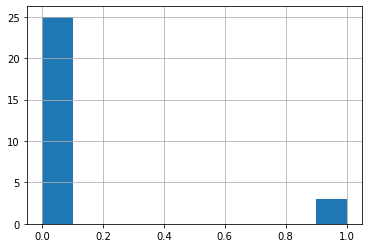

In [29]:
tweet_df["favorite_count"].hist() # create a histogram show the favorite count